In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix, recall_score, precision_score
import datetime

# Load Data

In [2]:
pwbdatafile = '..\\data\\pwb-data.csv'
pwbds = pd.read_csv(pwbdatafile)

In [3]:
pwbds.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
0,5/1/99 0:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,10.091721,0.053279,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,5/1/99 0:02,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,10.095871,0.062801,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,5/1/99 0:04,0,0.363848,-4.681394,-4.353147,14.127998,-0.138636,-17.836632,0.010803,-0.061114,...,10.100265,0.072322,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,5/1/99 0:06,0,0.301590,-4.758934,-4.023612,13.161567,-0.148142,-18.517601,0.002075,-0.061114,...,10.104660,0.081600,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,5/1/99 0:08,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,10.109054,0.091121,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [4]:
pwbds.shape

(17689, 63)

In [5]:
# x61 is a binary variable, and x28 is a categorical variable
pwbds_61 = pwbds.pop('x61')
pwbds_28 = pwbds.pop('x28')

# Exploratory Analysis

In [6]:
# Now, the target
pwbds.y.value_counts()

0    17568
1      121
Name: y, dtype: int64

121 registros de quebra da teia

In [7]:
#pwbds['date'] = pwbds['time'].str.split(' ').str[0]
#pwbds['time'] = pwbds['time'].str.split(' ').str[1]
pwbds['time']= pd.to_datetime(pwbds['time'])

## Verifica features nos momentos de quebra

In [8]:
pwbds.describe()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60
count,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,...,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000
mean,0.006840,0.047317,0.027483,0.453645,-14.389503,0.008860,1.750452,0.005834,-0.004892,-0.005682,...,2.817265,0.451067,0.443357,0.088171,1.398058,10.335317,0.291617,-0.002391,0.120121,0.001649
std,0.082426,0.711857,4.793481,5.875103,131.235172,0.643898,37.219689,0.107284,0.073239,0.146158,...,314.571562,6.324201,14.448824,3.056253,68.441998,82.028512,2.352927,0.049490,9.543262,0.004353
min,0.000000,-3.787279,-17.316550,-18.198509,-322.781610,-1.623988,-279.408440,-0.429273,-0.451141,-0.120087,...,-3652.989000,-187.943440,-1817.595500,-8.210370,-230.574030,-269.039500,-12.640370,-0.149790,-100.810500,-0.006964
25%,0.000000,-0.349527,-2.295339,-3.645733,-112.619710,-0.452250,-26.079780,-0.049319,-0.051043,-0.059966,...,29.984624,-3.940750,-1.820500,0.443065,-41.779721,-46.042212,-1.714772,0.000667,0.294367,-0.001580
50%,0.000000,0.145538,-0.169701,-0.455539,-19.110773,-0.124857,9.607949,0.000732,-0.011064,-0.030057,...,29.984624,0.294846,0.312068,0.642588,18.023380,3.652978,0.085826,0.012974,0.741495,0.001084
75%,0.000000,0.433226,2.144552,3.310988,83.573645,0.343969,31.761727,0.060853,0.038986,-0.000149,...,29.984624,5.487717,3.806209,2.669282,43.617252,64.579706,2.222118,0.021167,1.278216,0.004534
max,1.000000,3.054156,16.734899,15.900116,334.694098,4.239385,96.060768,1.705590,0.788826,3.206675,...,40.152348,14.180588,11.148006,6.475137,287.252017,252.147455,6.922008,0.060264,6.985460,0.020510


In [9]:
desc = pwbds.describe()

In [10]:
cols = [
    'x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20',
    'x21','x22','x23','x24','x25','x26','x27','x29','x30','x31','x32','x33','x34','x35','x36','x37','x38','x39','x40',
    'x41','x42','x43','x44','x45','x46','x47','x48','x49','x50','x51','x52','x53','x54','x55','x56','x57','x58','x59','x60',
    ]

dicts_list=[]
for col in cols:
#    print (col, ':',(pwbds.loc[pwbds.y==1][col] > desc.loc['max',col]*0.9).sum())
    dict_row = {'feature':col,
         'max_no':(pwbds.loc[pwbds.y==1][col] >= desc.loc['max',col]*0.9).sum(),
         'min_no':(pwbds.loc[pwbds.y==1][col] <= desc.loc['min',col]*0.1).sum()
    }
    dicts_list.append(dict_row)

anomalies = pd.DataFrame(dicts_list)

In [11]:
anomalies

,feature,max_no,min_no
0,x1,1,29
1,x2,0,76
2,x3,1,103
3,x4,1,55
4,x5,1,60
5,x6,0,47
6,x7,0,33
7,x8,1,42
8,x9,0,71
9,x10,0,65


## Comportamento de cada feature entre duas quebras consecutivas

In [52]:
cols = [
    'x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20',
    'x21','x22','x23','x24','x25','x26','x27','x29','x30','x31','x32','x33','x34','x35','x36','x37','x38','x39','x40',
    'x41','x42','x43','x44','x45','x46','x47','x48','x49','x50','x51','x52','x53','x54','x55','x56','x57','x58','x59','x60',
    ]
sns.set_theme(style="darkgrid")




In [53]:
break_m = 10
breaks = pwbds[pwbds.y==1]
start_brk = pwbds.index[pwbds.time==breaks.iloc[break_m,:].time]
end_brk = pwbds.index[pwbds.time==breaks.iloc[break_m+1,:].time]
brks_df = pwbds.iloc[start_brk[0]:end_brk[0]+1,:]

C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this 

C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this 

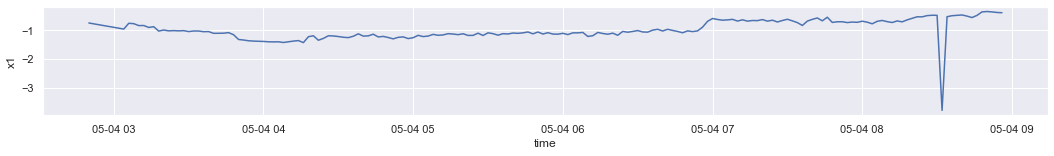

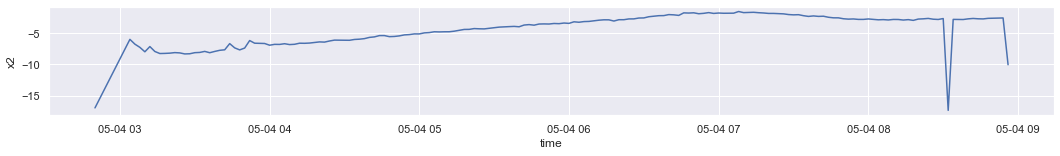

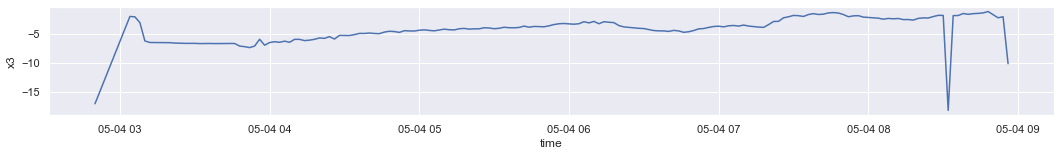

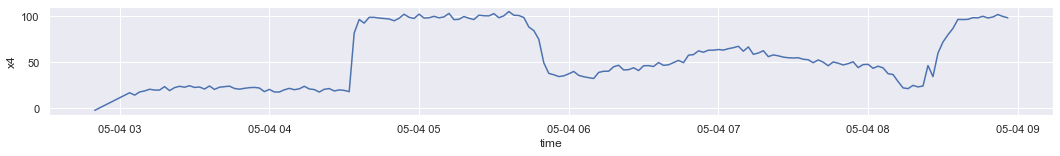

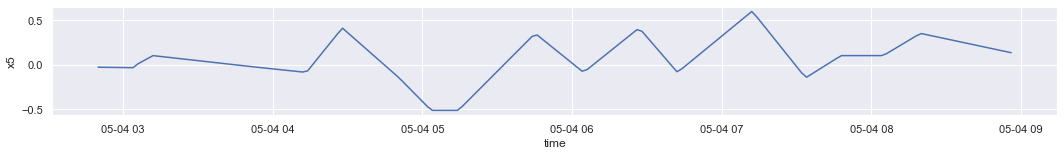

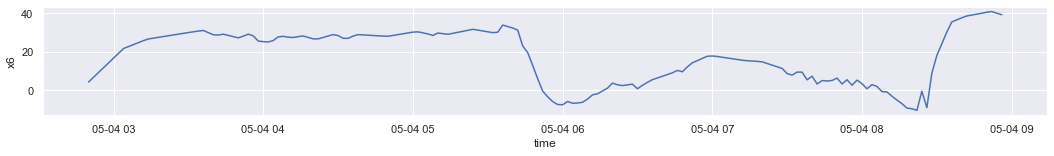

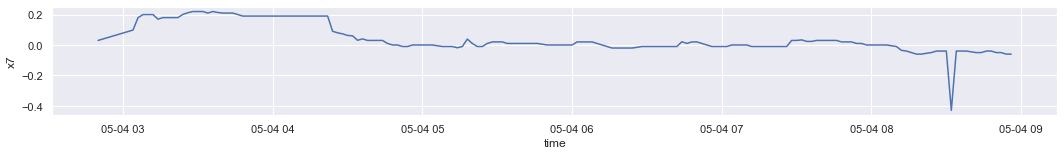

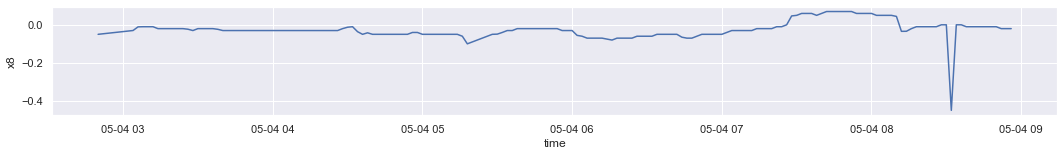

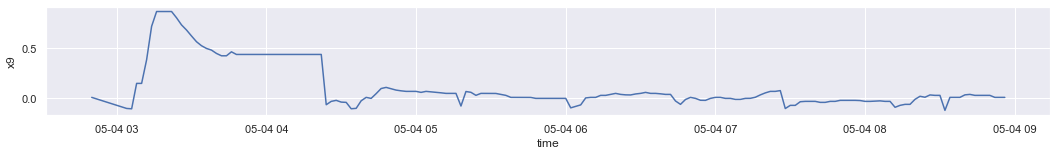

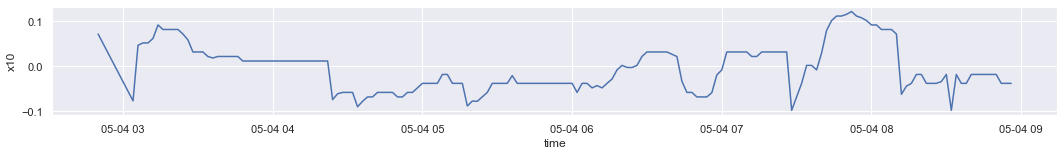

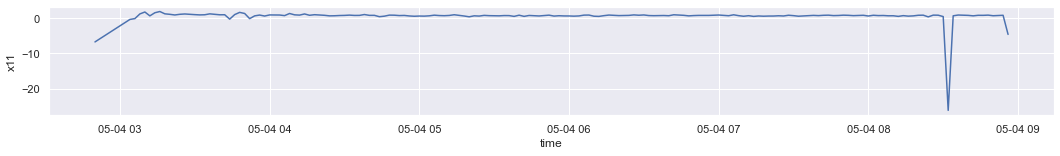

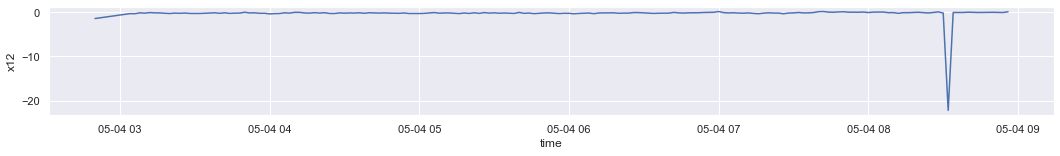

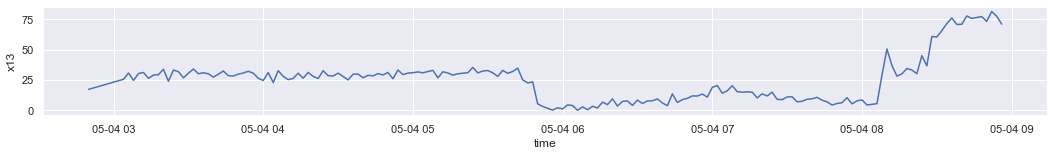

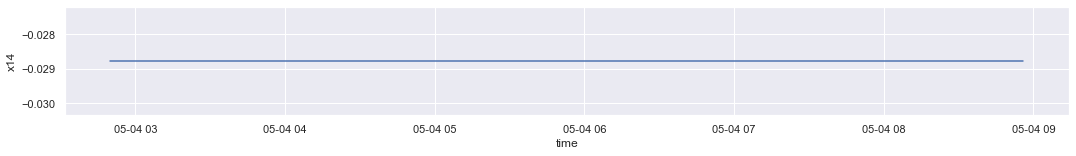

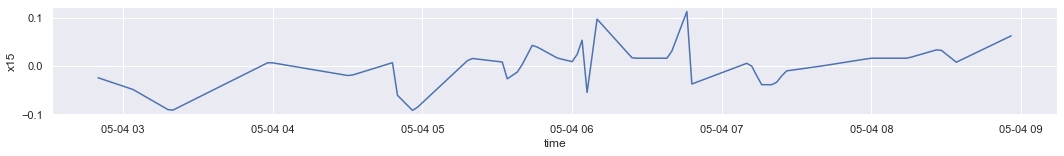

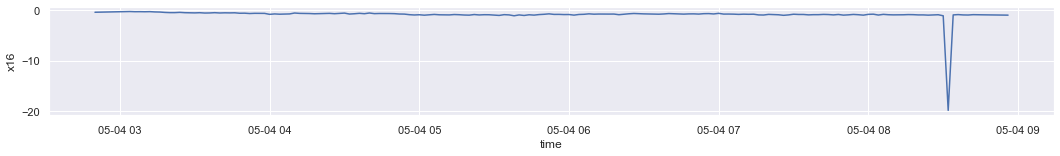

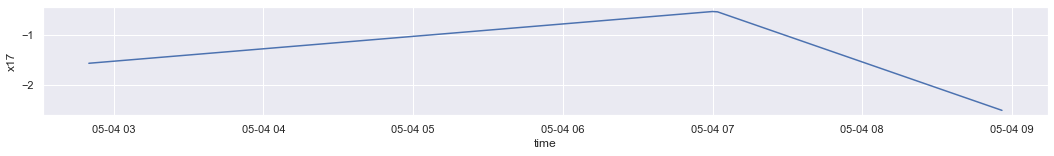

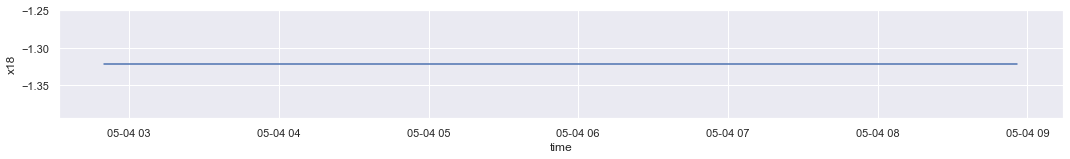

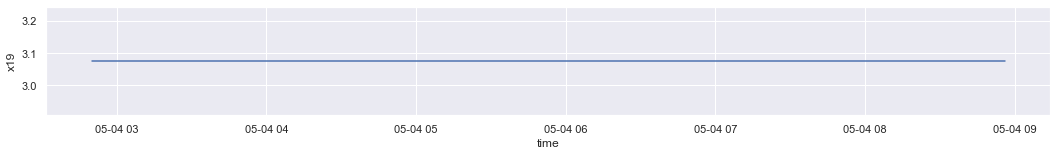

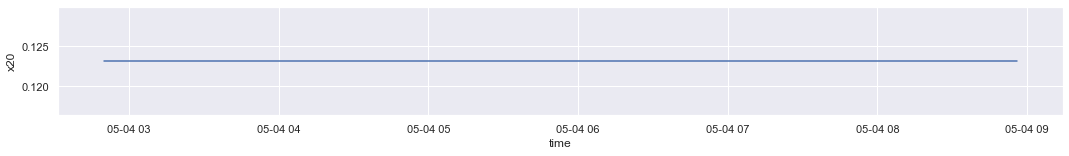

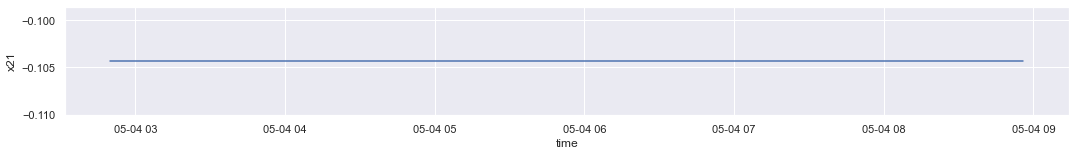

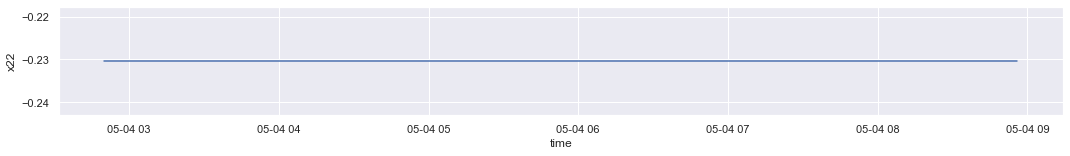

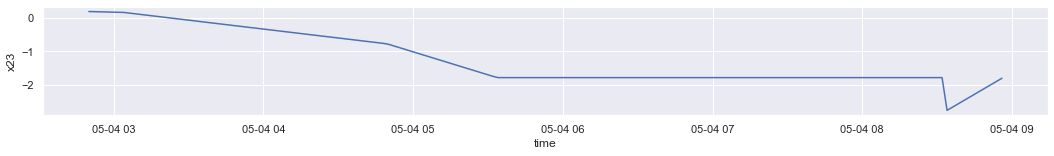

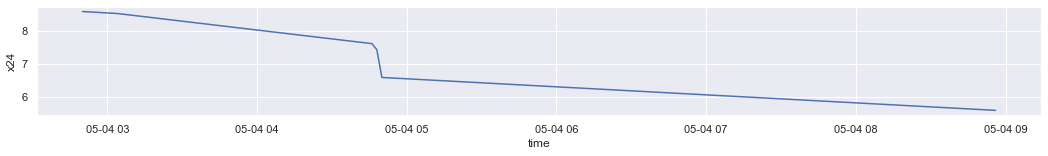

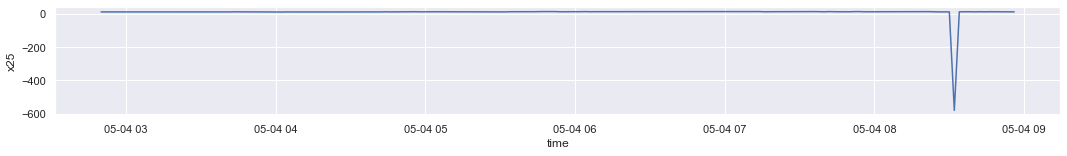

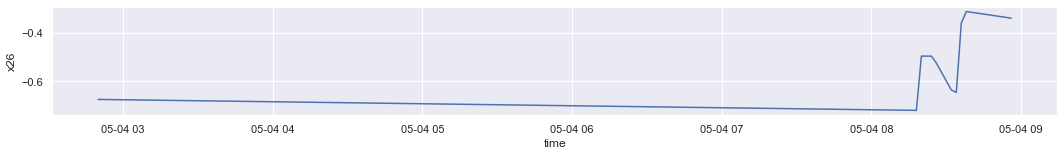

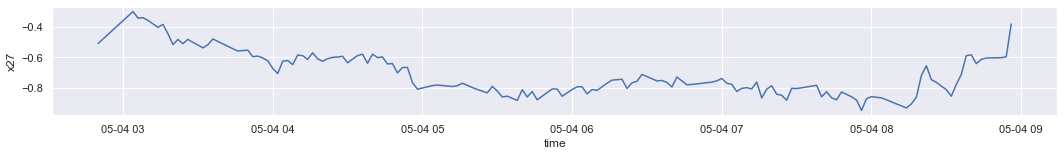

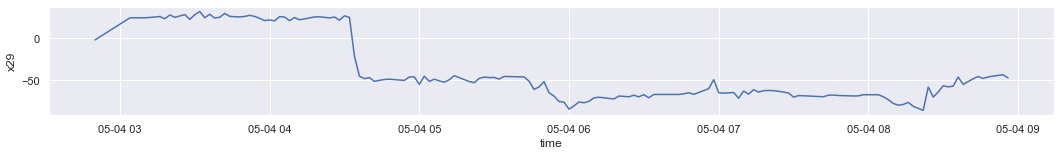

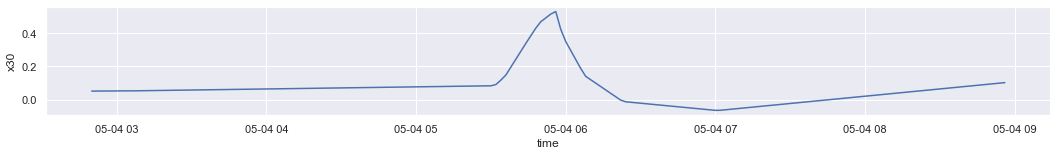

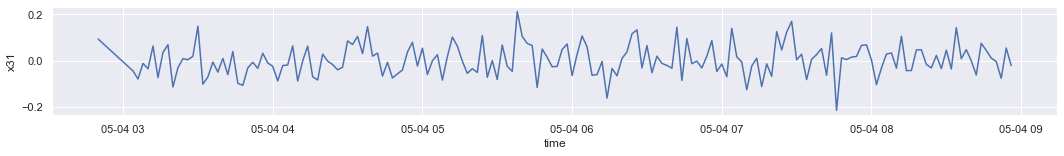

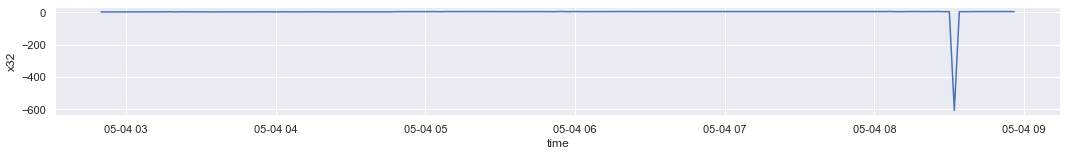

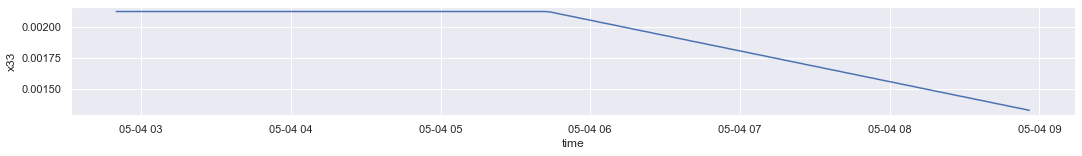

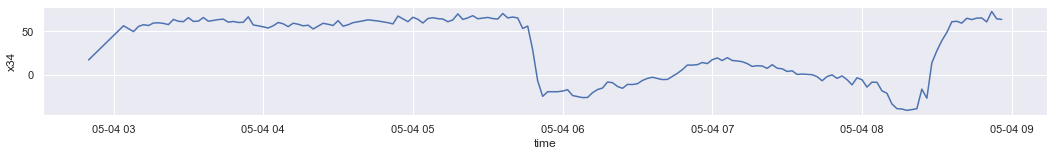

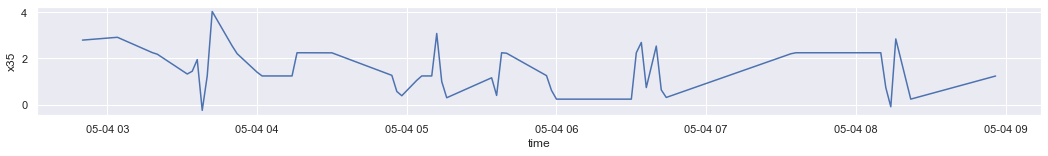

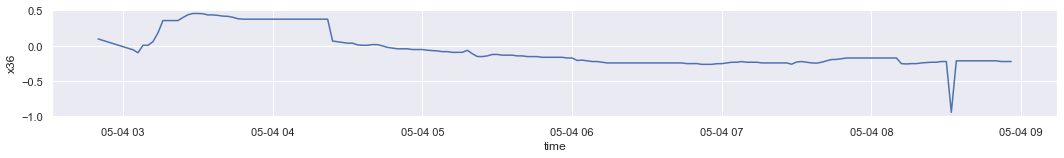

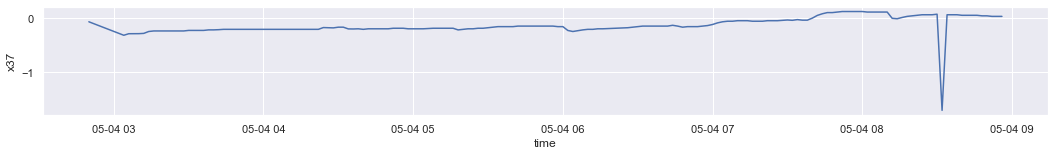

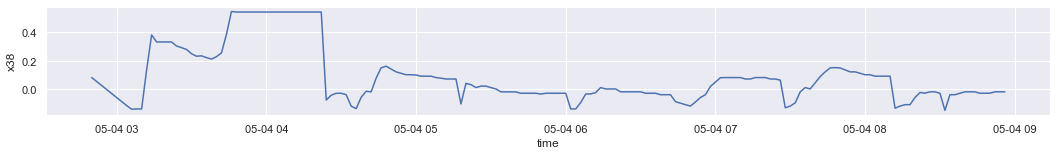

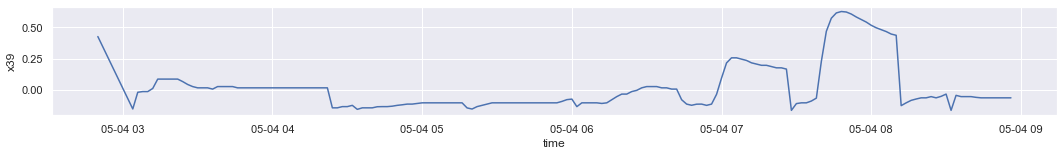

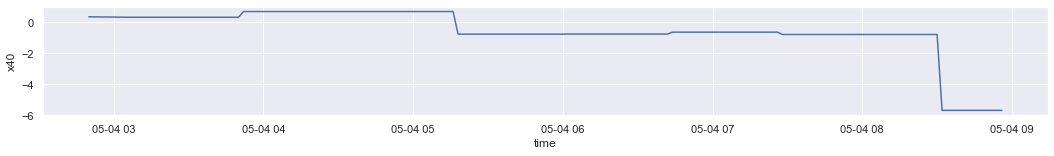

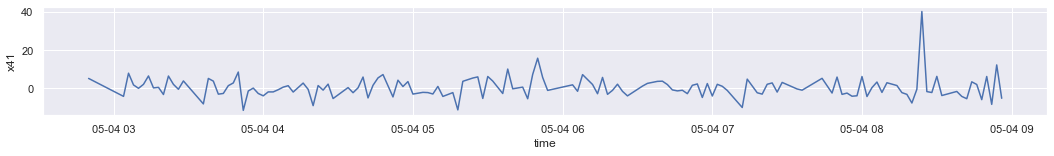

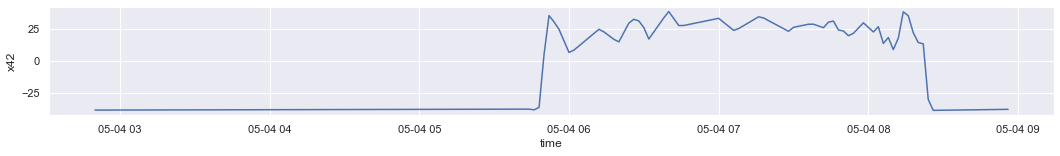

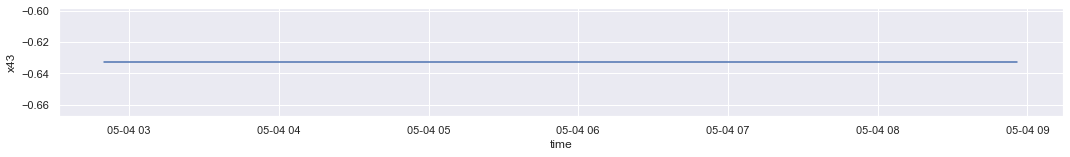

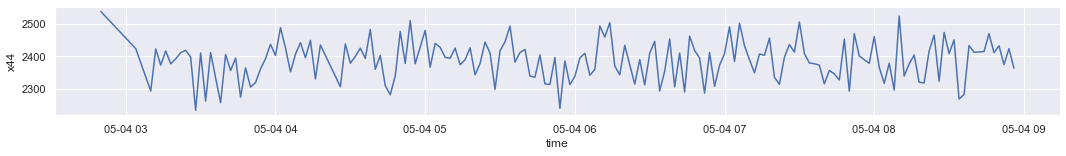

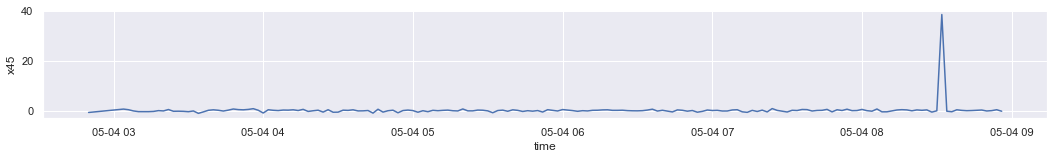

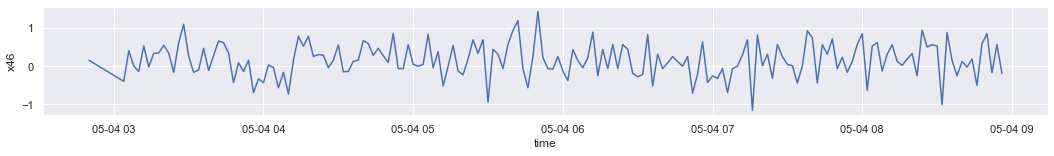

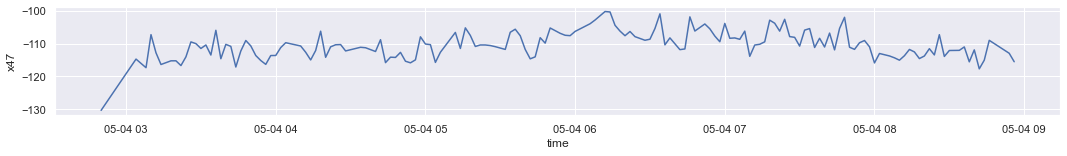

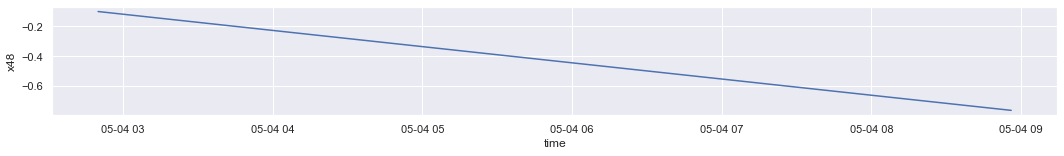

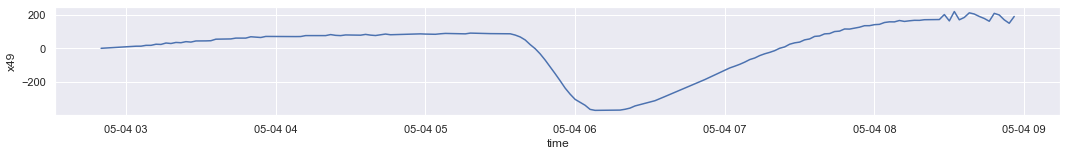

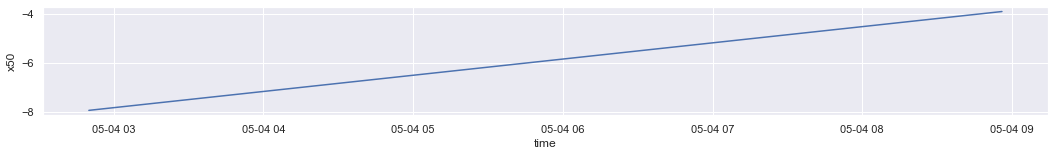

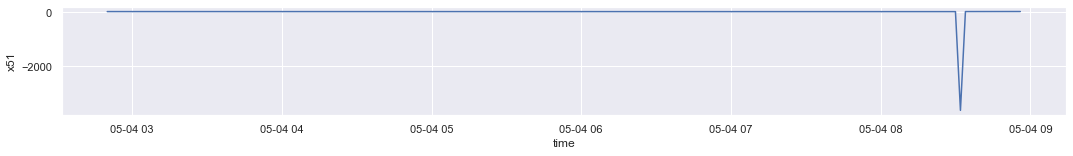

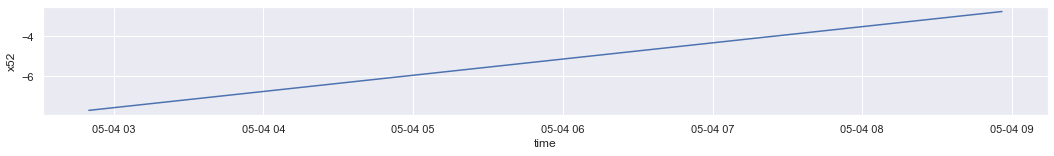

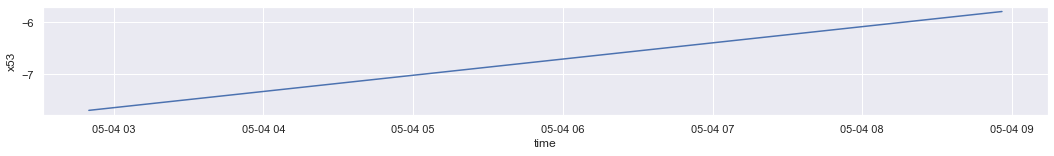

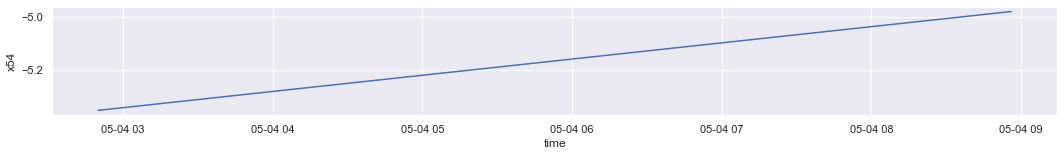

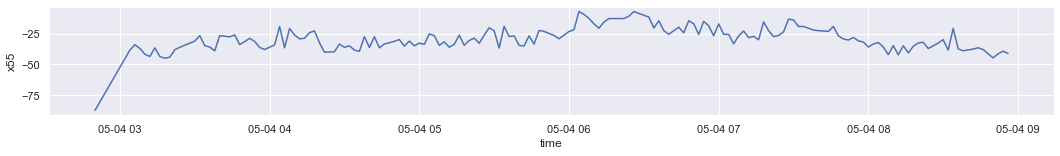

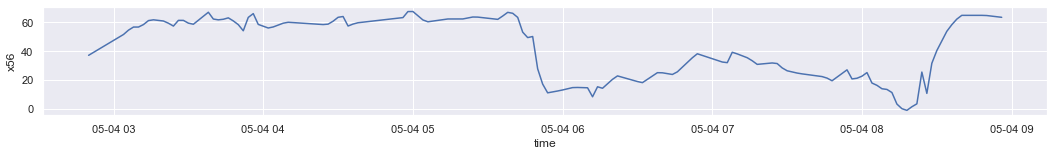

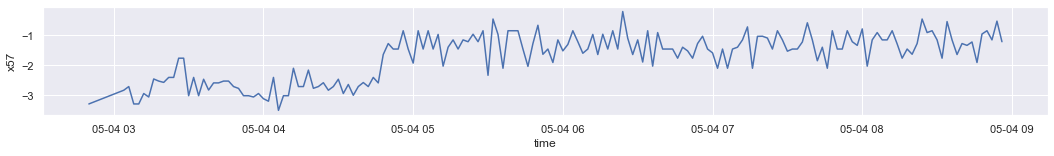

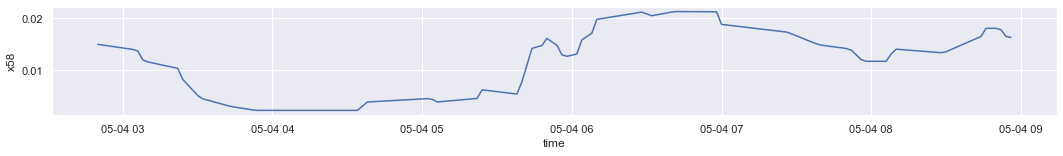

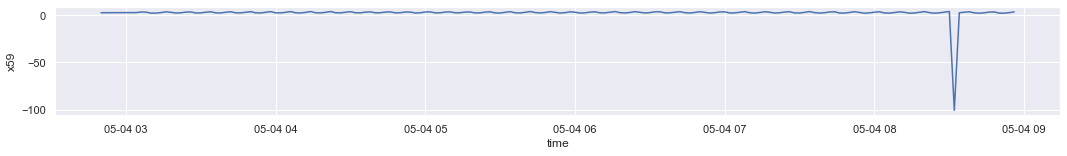

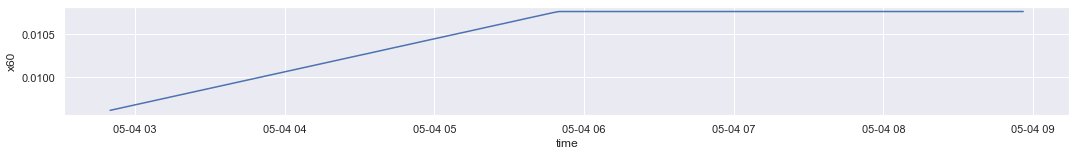

In [54]:
for col in cols:
    fig, ax = plt.subplots()
    fig.set_size_inches(18, 2)
#    col_ds = brks_df.groupby('time').agg({col:np.median}).reset_index()
    sns.lineplot(x="time", y=col, data=brks_df, ax=ax)

## Cálculo do Remaining Usefull Lifecycle (RUL)

In [22]:
# Dates whith break
df_sub = sorted(pwbds[pwbds['y'] == 1]['time'].tolist())

In [23]:
# variable to store all days
breakSubIdx=0
breakLstIdx=0
breakList = pwbds['y'].tolist()
nextbreak = []
for v1 in pwbds['time'].tolist():
    if((breakList[breakLstIdx] == 1)):
#        print ('1')
        nextbreak.append(v1)
        breakSubIdx = breakSubIdx+1
    else:
#        print('0')
        if (breakSubIdx < len(df_sub)):
            nextbreak.append(df_sub[breakSubIdx])
        else:
            nextbreak.append(df_sub[breakSubIdx-1])
    breakLstIdx = breakLstIdx+1
pwbds['nextbreaktime'] = pd.Series(nextbreak)

In [24]:
pwbds['RUL']=round((pwbds['nextbreaktime']-pwbds['time']).dt.total_seconds()/60,2)
pwbds.drop(pwbds[pwbds.RUL < 0].index, inplace=True)
pwbds.drop(['time', 'y','nextbreaktime'], axis=1, inplace=True)

In [25]:
pwbds.shape

(17894, 60)

In [26]:
pwbds.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,RUL
0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,-0.059966,-0.038189,...,10.091721,0.053279,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,518.0
1,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,-0.059966,-0.038189,...,10.095871,0.062801,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,516.0
2,0.363848,-4.681394,-4.353147,14.127998,-0.138636,-17.836632,0.010803,-0.061114,-0.030057,-0.018352,...,10.100265,0.072322,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,514.0
3,0.301590,-4.758934,-4.023612,13.161567,-0.148142,-18.517601,0.002075,-0.061114,-0.019986,-0.008280,...,10.104660,0.081600,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,512.0
4,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,-0.030057,-0.008280,...,10.109054,0.091121,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,510.0


## Marcação de falha no próximo período (próxima hora)

Using RUL, we can create a label indicating time to failure. We define a boolean (True\False) value for NEXT_H indicating the engine will fail within 60 minutes (RUL  <=60 ). 

We can also define a multiclass MULTI  ∈{0,1,2}  indicating {Healthy, RUL <=60, RUL <=120} minutes.

In [27]:
pwbds['NEXT_H'] = np.where(pwbds['RUL'] <= 60, 1, 0 )

In [28]:
pwbds.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x53,x54,x55,x56,x57,x58,x59,x60,RUL,NEXT_H
0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,-0.059966,-0.038189,...,0.053279,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,518.0,0
1,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,-0.059966,-0.038189,...,0.062801,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,516.0,0
2,0.363848,-4.681394,-4.353147,14.127998,-0.138636,-17.836632,0.010803,-0.061114,-0.030057,-0.018352,...,0.072322,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,514.0,0
3,0.301590,-4.758934,-4.023612,13.161567,-0.148142,-18.517601,0.002075,-0.061114,-0.019986,-0.008280,...,0.081600,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,512.0,0
4,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,-0.030057,-0.008280,...,0.091121,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,510.0,0


# Sharping & Splitting

In [29]:
def lstm_data_transform(x_data, y_data, num_steps=5):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

## Dataset for Model 1

In [30]:
pwbds_m1 = pwbds.copy()
#pwbds_m1.drop('NEXT_H',axis='columns', inplace=True)
yds_m1 = pwbds_m1.pop('RUL')

In [31]:
pwbds.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x53,x54,x55,x56,x57,x58,x59,x60,RUL,NEXT_H
0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,-0.059966,-0.038189,...,0.053279,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,518.0,0
1,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,-0.059966,-0.038189,...,0.062801,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,516.0,0
2,0.363848,-4.681394,-4.353147,14.127998,-0.138636,-17.836632,0.010803,-0.061114,-0.030057,-0.018352,...,0.072322,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,514.0,0
3,0.301590,-4.758934,-4.023612,13.161567,-0.148142,-18.517601,0.002075,-0.061114,-0.019986,-0.008280,...,0.081600,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,512.0,0
4,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,-0.030057,-0.008280,...,0.091121,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,510.0,0


In [32]:
num_steps = pwbds_m1.shape[1]
x_new, y_new = lstm_data_transform(pwbds_m1, yds_m1, num_steps=num_steps)
print ("The new shape of x is", x_new.shape)

The new shape of x is (17834, 60, 60)


In [33]:
train_ind = int(0.8 * pwbds.shape[0])
x_train = x_new[:train_ind]
y_train = y_new[:train_ind]
x_test = x_new[train_ind:]
y_test = y_new[train_ind:]

# Modeling 1: Regression - Predict RUL

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorflow\pyth

In [35]:
model_1 = keras.Sequential()
model_1.add(layers.LSTM(100, activation='tanh', input_shape=(num_steps, x_train.shape[2]), 
               return_sequences=True))
# Plus a 20% dropout rate
model_1.add(layers.Dropout(0.2))

# The second layer
model_1.add(layers.LSTM(
          units=50,
          return_sequences=False))

# Plus a 20% dropout rate
model_1.add(layers.Dropout(0.2))
model_1.add(layers.Dense(units=50, activation='relu'))
model_1.add(layers.Dense(units=1, activation='linear'))
adam = keras.optimizers.Adam(lr=0.0001)
model_1.compile(optimizer=adam, loss='mse')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [36]:
# Verify the architecture 
print(model_1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 100)           64400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                2550      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 97,201
Trainable params: 97,201
Non-trainable params: 0
____________________________________________________

In [37]:
history_m1 = model_1.fit(
    x_train, 
    y_train, 
    epochs=40,
#    batch_size=200, 
#    validation_split=0.10 # Use 10% of data to evaluate the loss. (val_loss)
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/40
14315/14315 [==============================] - 40s 3ms/sample - loss: 282468.3221
Epoch 2/40
14315/14315 [==============================] - 40s 3ms/sample - loss: 257829.2219
Epoch 3/40
14315/14315 [==============================] - 42s 3ms/sample - loss: 232097.7939
Epoch 4/40
14315/14315 [==============================] - 42s 3ms/sample - loss: 205466.3480
Epoch 5/40
14315/14315 [==============================] - 44s 3ms/sample - loss: 180734.7329
Epoch 6/40
14315/14315 [==============================] - 42s 3ms/sample - loss: 158484.1519
Epoch 7/40
14315/14315 [==============================] - 43s 3ms/sample - loss: 139446.2740
Epoch 8/40
14315/14315 [==============================] - 43s 3ms/sample - loss: 125192.1487
Epoch 9/40
14315/14315 [==============================] - 42s 3ms/sample - loss: 113892.2285
Epoch 10/40
14315/14315 [==============================] - 46s 3ms/sa

Text(0.5, 0, 'epochs')

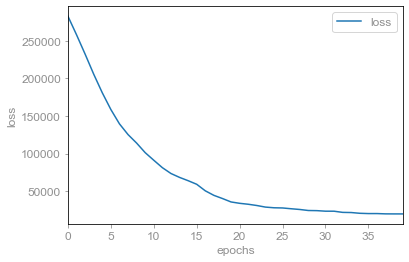

In [38]:
# Plot History
pd.DataFrame(history_m1.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [39]:
test_predict = model_1.predict(x_test)

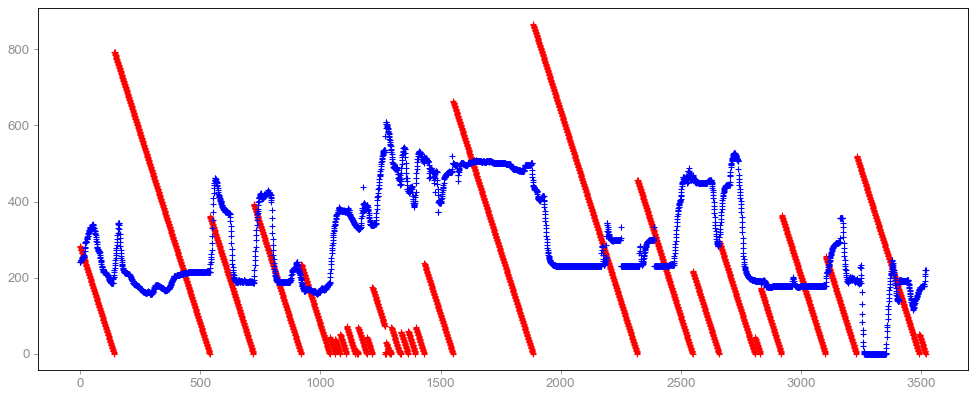

In [40]:
figure(figsize=(15, 6), dpi=80)
plt.plot(y_test,'r+')
plt.plot(test_predict,'b+')


In [41]:
import shap  # package used to calculate Shap values

# use Deep SHAP to explain test set predictions
#deep_explainer = shap.DeepExplainer(model_1.predict_proba, x_train)
#deep_shap_values = deep_explainer.shap_values(x_test)
#shap.force_plot(deep_explainer.expected_value[1], deep_shap_values[1], x_test)

Using TensorFlow backend.
keras is no longer supported, please use tf.keras instead.


AssertionError: <class 'method'> is not currently a supported model type!

## Truth

### Quantas quebras realmente ocorreram?

In [42]:
np.unique(y_test==0,return_counts=True)

(array([False,  True]), array([3485,   34], dtype=int64))

### Quando ocorreram?

In [43]:
break_moments= np.where(y_test == 0)

In [44]:
list(break_moments)

[array([ 141,  539,  721,  919, 1038, 1061, 1081, 1108, 1145, 1151, 1156,
        1192, 1215, 1269, 1272, 1288, 1294, 1330, 1334, 1364, 1395, 1431,
        1551, 1884, 2318, 2548, 2658, 2807, 2830, 2918, 3101, 3230, 3491,
        3518], dtype=int64)]

## Previsões

### Quantas indicações abaixo de 4 minutos? 

In [45]:
np.unique(test_predict < 240 ,return_counts=True)

(array([False,  True]), array([1691, 1828], dtype=int64))

### Quando ocorreram?

In [46]:
np.where(test_predict < 240)[0]

array([  88,   89,   90, ..., 3516, 3517, 3518], dtype=int64)

## Acertos
### Quantos e quando?

In [47]:
when_pred = np.where(test_predict < 240)[0].tolist()
when_true = np.where(y_test == 0)[0].tolist()

In [48]:
commonalities = set(when_pred) - (set(when_pred) - set(when_true))

In [49]:
commonalities

{141, 539, 721, 919, 1038, 2318, 2807, 2830, 2918, 3101, 3230, 3491, 3518}

# Modeling 2: Binary Classification - Break in the next hour

## Dataset for model 2

In [50]:
pwbds_m2 = pwbds
yds_m2 = pwbds_m2.pop('NEXT_H')

In [51]:
num_steps = pwbds_m2.shape[1]
x_new, y_new = lstm_data_transform(pwbds_m2, yds_m2, num_steps=num_steps)
print ("The new shape of x is", x_new.shape)

The new shape of x is (17834, 60, 60)


In [52]:
train_ind = int(0.8 * pwbds.shape[0])
x_train = x_new[:train_ind]
y_train = y_new[:train_ind]
x_test = x_new[train_ind:]
y_test = y_new[train_ind:]

# Model 2

In [53]:
model_2 = keras.Sequential()
model_2.add(layers.LSTM(100, activation='tanh', input_shape=(num_steps, x_train.shape[2]), 
               return_sequences=True))
# Plus a 20% dropout rate
model_2.add(layers.Dropout(0.2))

# The second layer
model_2.add(layers.LSTM(
          units=50,
          return_sequences=False))

# Plus a 20% dropout rate
model_2.add(layers.Dropout(0.2))
model_2.add(layers.Dense(units=50, activation='relu'))
model_2.add(layers.Dense(units=1, activation='sigmoid'))
adam = keras.optimizers.Adam(lr=0.0001)
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Verify the architecture 
print(model_2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 100)           64400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 97,201
Trainable params: 97,201
Non-trainable params: 0
__________________________________________________

In [54]:
history_m2 = model_2.fit(
    x_train, 
    y_train, 
    epochs=20,
#    batch_size=200, # 
#    validation_split=0.10 # Use 10% of data to evaluate the loss. (val_loss)
)

Epoch 1/20
14315/14315 [==============================] - 41s 3ms/sample - loss: 0.1646 - acc: 0.9267
Epoch 2/20
14315/14315 [==============================] - 43s 3ms/sample - loss: 0.0893 - acc: 0.9659
Epoch 3/20
14315/14315 [==============================] - 42s 3ms/sample - loss: 0.0786 - acc: 0.9709
Epoch 4/20
14315/14315 [==============================] - 41s 3ms/sample - loss: 0.0741 - acc: 0.9732
Epoch 5/20
14315/14315 [==============================] - 41s 3ms/sample - loss: 0.0728 - acc: 0.9747
Epoch 6/20
14315/14315 [==============================] - 40s 3ms/sample - loss: 0.0577 - acc: 0.9800
Epoch 7/20
14315/14315 [==============================] - 43s 3ms/sample - loss: 0.0569 - acc: 0.9811
Epoch 8/20
14315/14315 [==============================] - 41s 3ms/sample - loss: 0.0571 - acc: 0.9801
Epoch 9/20
14315/14315 [==============================] - 47s 3ms/sample - loss: 0.0640 - acc: 0.9773
Epoch 10/20
14315/14315 [==============================] - 40s 3ms/sample - loss: 

Text(0.5, 0, 'epochs')

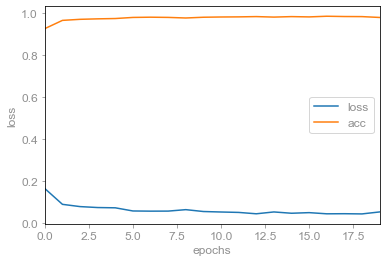

In [55]:
# Plot History
pd.DataFrame(history_m2.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [56]:
#scores_2 = model_2.evaluate(x_test, y_test, verbose=1, batch_size=200)
scores_2 = model_2.evaluate(x_test, y_test, verbose=1)
print('Training Accurracy: {}'.format(scores_2[1]))

3519/3519 [==============================] - 2s 529us/sample - loss: 1.3911 - acc: 0.5303
Training Accurracy: 0.5302642583847046


In [57]:
# make predictions and compute confusion matrix
#y_pred = model_2.predict_classes(x_test,verbose=1, batch_size=200)
y_pred = model_2.predict_classes(x_test,verbose=1)
y_true = y_test
print('Training Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true, y_pred)
cm

3519/3519 [==============================] - 2s 511us/sample
Training Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels


array([[1032, 1653],
       [   0,  834]], dtype=int64)

In [58]:
# compute precision and recall
precision_test = precision_score(y_true, y_pred)
recall_test = recall_score(y_true, y_pred)
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
print( 'Test Precision: ', precision_test, '\n', 'Test Recall: ', recall_test, '\n', 'Test F1 Score:', f1_test)

Test Precision:  0.3353437876960193 
 Test Recall:  1.0 
 Test F1 Score: 0.5022583559168925
